# Exercise 1


The goal of this problem is to implement your own random projection function, i.e. same as in the random projection theorem and Johnson Lindenstrauss. Below you will find a function template, as always fill in XXX.

Some notes, the input will be a numpy array and the output should also be a numpy array. The format for the input is `(n_samples, d)` and the output should be of the form `(n_samples, k)`.

In [1]:
# Do not rename the function below just replace what is XXX
import numpy as np

def random_projection(X, d, k):
    '''Perform a random projection of the dataset X from 
    d-dimensions into k-dimensions'''
    # Ensure the input X has the correct shape
    assert X.shape[1] == d, "The array X does not have the shape (n_samples, d)"
    
    # Generate a random projection matrix of shape (d, k)
    random_matrix = np.random.normal(0, 1, size=(d, k)) / np.sqrt(k)
    
    # Perform the projection
    X_projected = np.dot(X, random_matrix)
    
    return X_projected


# Exercise 2


Write a function that generates points from a unit ball and unit sphere in $d$ dimensions. The output should be a numpy array of shape `(n_samples,d)`. As always replace XXX with whatever makes sense.

Hint, numpy has a function called power, https://numpy.org/doc/stable/reference/generated/numpy.power.html
also remember `numpy.linalg.norm` to calculate length of vectors.

Another hint that might be useful, note that numpy has broadcasting rule in order to make sense of the multiplication between different size vectors. Say we would like to compute the product of a (10,10) vector and a (10,1) vector, in this case numpy will broadcast the second vector to (10,10) by copying the values along the second axis. However for this to work they both have to have the same number of dimensions, i.e. we cannot multiply (10,10) and (10,) we have to reshape the second vector to (10,1) for broadcasting to work).

In [5]:
import numpy as np

def uniform_unit_ball(n_samples=1, d=1, surface=False):
    '''Generate n_samples uniform random samples from the unit ball in d-dimensions.
    If surface==True generate only from the surface of the ball'''
    # Ensure inputs are valid
    assert isinstance(n_samples, int), "samples needs to be integer"
    assert isinstance(d, int), "d needs to be integer"
    assert n_samples > 0, "Positive number of samples"
    assert d >= 1, "Dimension needs to be greater than or equal to 1"
    
    # Generate random points from a standard normal distribution
    samples = np.random.normal(0, 1, size=(n_samples, d))
    
    # Normalize to get points on the unit sphere
    norms = np.linalg.norm(samples, axis=1, keepdims=True)  # Calculate the norms of the points
    samples_on_sphere = samples / norms  # Normalize points to have unit length
    
    if surface:
        # Return points on the unit sphere
        return samples_on_sphere
    else:
        # Scale by a random radius from [0, 1]^(1/d) to get uniform points in the unit ball
        radii = np.random.uniform(0, 1, size=(n_samples, 1)) ** (1 / d)
        samples_in_ball = samples_on_sphere * radii  # Scale the sphere points by the radii
        return samples_in_ball


# Exercise 3


Perform the following three steps, then answer the question:

1. Generate 200 points from the surface of the unit ball in 50 dimensions (use your solution from problem 2).
2. Generate a few random lines through the origin and plot the distribution of points on each line.
3. What does your result from 2 say about where the surface area is concentrated relative to each line

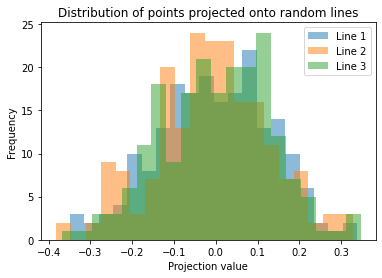

In [6]:
# Dont edit the below array, use the index corresponding to the correct answer
problem3_multiple_choice = ['On the north and south pole according to the line',
                            'Uniformly distributed over [-1,1]',
                            'Around the equator orthogonal to the line',
                            'This depends on the line, we get a different distribution each time']

# Generate 200 points on the surface of the unit sphere in 50 dimensions
n_samples = 200
d = 50
surface_points = uniform_unit_ball(n_samples=n_samples, d=d, surface=True)
import matplotlib.pyplot as plt

# Generate 3 random unit vectors (lines through the origin)
num_lines = 3
random_lines = uniform_unit_ball(n_samples=num_lines, d=d, surface=True)

# Project points onto each line and compute the distribution
for i, line in enumerate(random_lines):
    projections = np.dot(surface_points, line)  # Project points onto the line
    plt.hist(projections, bins=20, alpha=0.5, label=f'Line {i+1}')
    
plt.xlabel('Projection value')
plt.ylabel('Frequency')
plt.title('Distribution of points projected onto random lines')
plt.legend()
plt.show()

problem3_answer = problem3_multiple_choice[2]  # 'Around the equator orthogonal to the line'



# Exercise 4


Why does `findSingularVectors` give rise to no-convergence sometimes, specially when we try to extract many singular vectors, say trying to extract 6 singular vectors from 10-d gaussian random vectors?

In [8]:
# Write your answer by filling in the string, this is free text
problem4_answer = (
    "The issue arises because the random vectors may not have sufficiently distinct singular values. "
    "When trying to extract multiple singular vectors, especially in cases where the input matrix is small or has near-duplicate rows/columns, "
    "the numerical methods used to compute the singular vectors (such as iterative methods) can struggle to converge due to numerical instability. "
    "This is particularly problematic when the matrix is nearly rank-deficient, or when the singular values of the matrix are very close to each other, "
    "making it difficult for the algorithm to reliably separate the directions associated with the singular vectors. "
    "In essence, the lack of clear separation between the singular values causes the iterative process to oscillate or stagnate, leading to non-convergence."
)

# Exercise 5 


Use the power method to compute the first 5 singular vectors for the matrix `problem5_Z` found below. Compute each singular vector to the tolerance of $10^{-6}$, in the following sense, (call $Z=$ `problem5_Z`)
$$
    \left \| v - \frac{Z^T Z v}{\|Z^T Z v\|} \right \| < 10^{-6}.
$$
for the proposed singular unit vector $v$.

In [10]:
import numpy as np

# The matrix
problem5_Z = np.array([
    [1.21395528,  0.61319117,  0.96775704,  0.47560786,  0.46944868, -0.96174286, -0.04597716,  1.11423879, -2.16790516,  1.41559609],
    [-1.74579582, -2.96579703, -1.53883473, -2.08891653, -2.51835633,  0.28005013,  3.14477698,  0.27859531, -0.21063502,  1.21238791],
    [-1.38846711, -2.36561478,  2.00400938, -0.81219207,  0.76351148, -0.94135869,  1.81624568,  0.30603084,  0.4502897 , -1.68275369],
    [-0.83770176, -1.12651679,  0.72947716,  0.28293936, -1.54650026,  1.47451872,  0.58828722,  2.63367002, -1.75123164,  0.20599531],
    [0.16922431,  0.07605318,  0.87850331,  0.45439765, -0.36589416, -1.16866643,  1.00148338, -2.24790302, -1.03375691,  0.66441057],
    [0.18417791, -0.6944261 ,  0.11811434, -0.02291727, -3.49209616,  2.567174  , -0.79506183, -0.61917615, -0.25294073, -0.44972644],
    [0.21973089,  0.58409936,  0.05358338,  0.09448722,  1.18545664,  0.09458799, -1.45002309,  1.38528763, -0.26669331, -0.02398977],
    [-0.77246978, -1.29899321,  0.32673874,  0.41253631,  0.9496008 ,  0.23276985, -0.44480295, -1.70329931,  0.74889995,  0.10723953],
    [0.87892498,  1.51055297,  0.99208142,  0.15116986, -0.419831  , -1.51231948,  2.44759401, -0.34096878,  0.78995641,  0.1464366 ],
    [0.4855678 , -0.49584481,  0.97413157, -1.44802482,  0.4773462 ,  0.08619087, -1.15799392, -0.3331743 , -1.40555249, -0.76420582]
])

def power_method(Z, tol=1e-6, max_iter=1000):
    """Compute the dominant singular vector of Z."""
    n, d = Z.shape
    v = np.random.rand(d)  # Random initialization
    v /= np.linalg.norm(v)  # Normalize

    for _ in range(max_iter):
        # Multiply by Z^T Z
        Zv = Z.T @ (Z @ v)
        v_new = Zv / np.linalg.norm(Zv)  # Normalize

        # Check convergence
        if np.linalg.norm(v - v_new) < tol:
            break
        v = v_new

    return v

def compute_top_singular_vectors(Z, num_vectors=5, tol=1e-6):
    """Compute the top `num_vectors` singular vectors of Z using the power method."""
    n, d = Z.shape
    singular_vectors = []

    for _ in range(num_vectors):
        v = power_method(Z, tol=tol)  # Compute dominant singular vector
        singular_vectors.append(v)

        # Deflate the matrix to remove the contribution of the found singular vector
        Z = Z - (Z @ v).reshape(-1, 1) @ v.reshape(1, -1)

    return np.array(singular_vectors)

# Compute the first 5 singular vectors
first_five_singular_vectors = compute_top_singular_vectors(problem5_Z, num_vectors=5)

# Display the result
first_five_singular_vectors


array([[ 0.32065306,  0.5390043 ,  0.09356078,  0.25556029,  0.52719588,
        -0.20401178, -0.45327196, -0.07215467,  0.03412773, -0.03476404],
       [ 0.09896577,  0.0762377 , -0.16995008,  0.08072425, -0.34856802,
         0.57549003, -0.56745926,  0.33191532, -0.25135397,  0.03080755],
       [ 0.06708774,  0.02228961,  0.29541581, -0.01999594,  0.14763066,
        -0.23413645,  0.23930085,  0.70627373, -0.50364318,  0.14482217],
       [ 0.32496671,  0.48773119, -0.17988504,  0.16765533, -0.49023235,
        -0.12218475,  0.34029079, -0.17991115, -0.10206046,  0.42685939],
       [-0.16666916,  0.15579462, -0.63618546, -0.02305143,  0.20672372,
        -0.02040569,  0.11854826,  0.49198584,  0.47101898,  0.1468754 ]])